# 3. The Central Dogma of Molecular Biology


The __Central Dogma of Molecular Biology__  is the process by which the instructions in DNA are converted into a functional product. It its most siimplest explanation, it involves the following processes:

- Replication: DNA is copied during cell division so the two daughter cells inherit the same genetic information. 

- Transcription: the information in the DNA of every cell is converted into small, portable RNA messages.

- Translation: During translation, these messages travel from where the DNA is in the cell nucleus to the ribosomes where they are ‘read’ to make specific proteins.

We will write a mathematical simplified version of the Central Dogma using the differential form of the Mass action Law. To do that, we will consider a gene that is regulated by a transcription factor $T$, and let M denote the RNA molecular species resulting from this gene transcription. Under the assumption that chemical kinetics can be used to model gene expression and gene regulation, we can write the following reaction:

$$
\begin{align}
T+D &\overset{k_M}{\longrightarrow} M \tag{1}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{2}\\
\end{align}
$$

- $[M]$ is the concentration of mRNA 
- $[D]$ is the concentration of gene copies
- $[T]$ is the transcription factor
- $k_M$ is the maximum transcription rate of a gene copy 
- $\gamma_M$ is the RNA degradation rate 

Based on the Mass Action Law, and assuming that both `D` and `T` are constant, the equation governing the dynamics of the RNA concentration [M] is:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  k_M [D]  [T]- \gamma_M [M] \tag{3}
$$

To solve this equation, we first separate the variables in both sides of the equation as: 

$$\begin{align*}
   \frac{\mathrm{d} [M]}{\mathrm{d} t} + \gamma_M [M] &=  k_M [D] [T] \tag{4}\\
 \end{align*}$$  
   
   We need to calculate the integrating factor, $e^{ \int p(x)dx }$, which in this case is $e^{ \int k_2dt }=e^{\gamma_M \cdot t}$. We then multiply both terms in the previous equation by the integrating factor. In this case is simply 
  $$\begin{align*}
   e^{\gamma_M \cdot t} \frac{\mathrm{d} [M]}{\mathrm{d} t} + \gamma_M [M] e^{\gamma_M \cdot t} &=  k_M [D] [T] e^{\gamma_M \cdot t}\tag{5}
 \end{align*}$$  
 the first term of the equation is simply
  
  $$\begin{align*}
   \frac{\mathrm{d} ([M] e^{\gamma_M \cdot t})}{\mathrm{d} t} &=  k_M [D] [T] e^{\gamma_M \cdot t} \tag{6}
 \end{align*}$$ 
 
 we change the `dt` to teh left side and then integrate both sides of the equation:
 $$\begin{align*}
  \int \mathrm{d} ([M] e^{\gamma_M \cdot t}) &= \int k_M [D] [T] e^{\gamma_M \cdot t} \mathrm{d} t\tag{7}\\
      [M] e^{\gamma_M \cdot t} &= \frac{k_M [D] [T]}{\gamma_M}  e^{ \gamma_M \cdot t} + C \tag{8}\\
 \end{align*}$$ 
 
 that rearranging terms becomes 

 $$\begin{align*}
      [M]  &= \frac{k_M [D] [T]}{\gamma_M} + C \cdot e^{-\gamma_M \cdot t}\tag{9}\\
 \end{align*}$$ 
 
 to evaluate the integration constant, we use the initial value of `M`:
 
  $$\begin{align*}
      [M(0)]  &= \frac{k_M [D] [T]}{\gamma_M} + C \tag{10}\\
      C &= [M(0)] - \frac{k_M [D] [T]}{\gamma_M}  \tag{11}\\
 \end{align*}$$ 
 
 therefore

  $$\begin{align*}
      [M(t)]  &= \frac{k_M [D] [T]}{\gamma_M} + [M(0)] \cdot e^{-\gamma_M \cdot t} - \frac{k_M [D] [T]}{\gamma_M} \cdot e^{-\gamma_M \cdot t}\tag{12}\\
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{k_M [D] [T]}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{13}\\
 \end{align*}$$ 
      
Therefore, the dynamics of `mRNA` looks like this:

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
k_M=1
γ_M=1
T=1
D=1
M₀=0.2
t=collect(0:0.1:10);

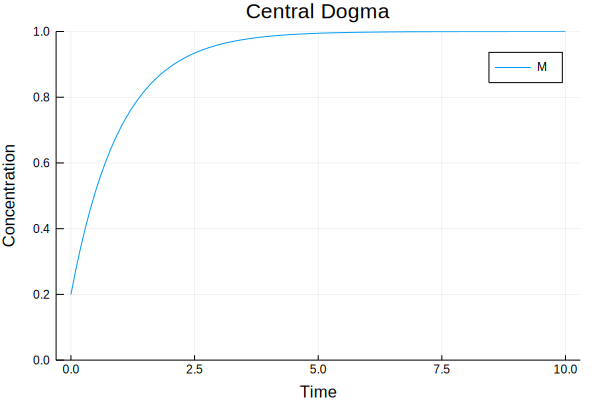

In [3]:
plot(t,t-> M₀*exp(-γ_M*t)+k_M*D*T/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
title!("Central Dogma")
xaxis!("Time")
yaxis!("Concentration")

## Promoter leakining

This simplified approximation does not take into acount that promoters are not perfect, and that there is often a basal production of mRNA that is not negligible. The next set of inetactions includes the basal production of `M` in abseence of transcription factor `T` with a rate $\alpha_0$:

$$
\begin{align}
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{14}\\ 
T+D &\overset{k_M}{\longrightarrow} M \tag{15}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{16}\\
\end{align}
$$

Now, the equation governing the dynamics of the mRNA concentration [M] is:

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  \alpha_0 + k_M [D]  [T]- \gamma_M [M] \tag{17}
$$
Following the same steps as the previous equation, we obatin the following solution:

 $$\begin{align*}
      [M]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + C \cdot e^{-\gamma_M \cdot t}\tag{18}\\
 \end{align*}$$ 
 
  to evaluate the integration constant, we use the initial value of `M`:
 
  $$\begin{align*}
      [M(0)]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + C \tag{19}\\
      C &= [M(0)] - \frac{\alpha_0 + k_M [D] [T]}{\gamma_M}  \tag{20}\\
 \end{align*}$$ 
 
 therefore the final equation is

  $$\begin{align*}
      [M(t)]  &= \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} + [M(0)] \cdot e^{-\gamma_M \cdot t} - \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} \cdot e^{-\gamma_M \cdot t}\tag{21}\\
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + k_M [D] [T]}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{22}\\
 \end{align*}$$ 
      
Therefore, with promoter leaking the dynamics of `mRNA` looks like this:

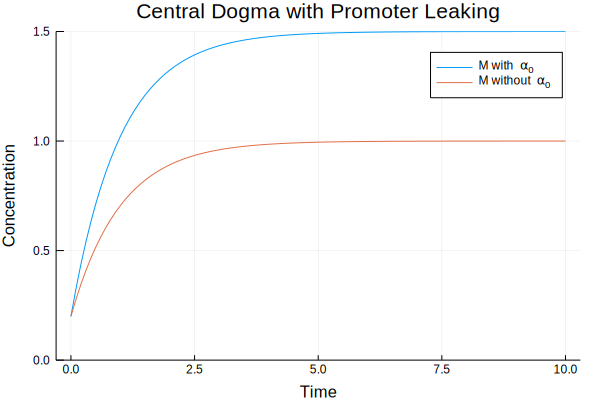

In [4]:
α_0=0.5
plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*T)/γ_M*(1-exp(-γ_M*t)),label="\\ M with \\alpha_0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+( k_M*D*T)/γ_M*(1-exp(-γ_M*t)),label="\\ M without \\alpha_0",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma with Promoter Leaking")
xaxis!("Time")
yaxis!("Concentration")

## Hill Function and cooperativity

This first version of the model assumes that one molecule of transcription factor `T` results in one molecule of `mRNA`. This is not the case in transcription, since a molecule of transcription factor is able to recruit many molecules of `pRNA` and activate transcription of many `mRNA` molecules. Therefore, more molecules of transcition factor means more activation of the transcription of `M`. This way, we write the rate of production of `M` depending on the number of molecules of transciption factor `T` as a function: 

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}=  \alpha_0 + k_M [D] \Phi ([T])- \gamma_M [M] \tag{23}
$$

$\Phi ([T])$ can be interpreted as the probability that a gene copy is transcribed at a given time, as a function of $[T]$. This dependence allows us to introduce the concept of a  transcription factor as activators (its presence results in activation of transcription) or as repressors (its presence results in repression of transcription). 
Depending on this, the regulatory function $\Phi([T])$ will increase or decrease with `T`. As a first approximation, $\Phi([T])$ is often assumed as a step function., i.e, the gene is transcribed (or repressed) when the transcription factor is bounded. 

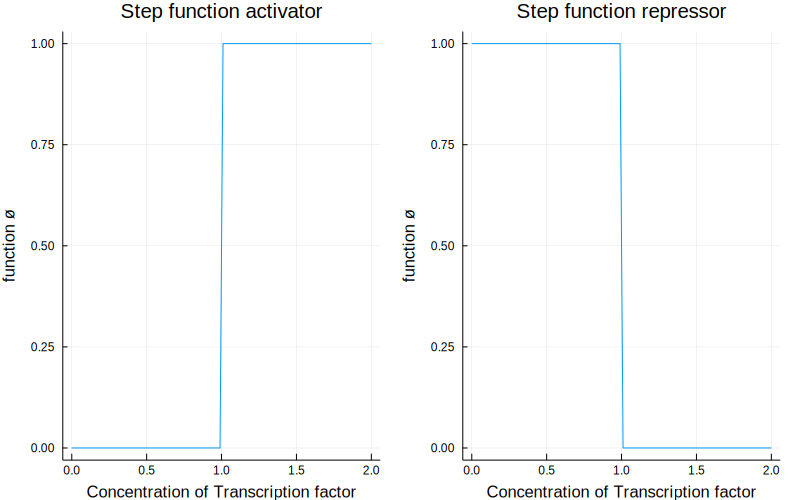

In [5]:
T_vector= LinRange(0,2,100)
n=1000
K=1
ϕ=D.*T_vector.^n./(K.^n.+T_vector.^n)
P1=plot(T_vector,ϕ,lab="")
title!("Step  function activator")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")

ϕ=D.*K.^n./(K.^n.+T_vector.^n)
P2=plot(T_vector,ϕ,lab="")
title!("Step function repressor")
xlabel!("Concentration of Transcription factor")
ylabel!("function ø")


plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

 The analytical soultion will look quite similar to the previous equation, just replacing [$T$] by [$\Phi ([T])$]

$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + k_M [D] \Phi ([T])}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{24}\\
 \end{align*}$$ 
 
 and the solution will depend on whether there is a value of `T` higher or lower than 1:

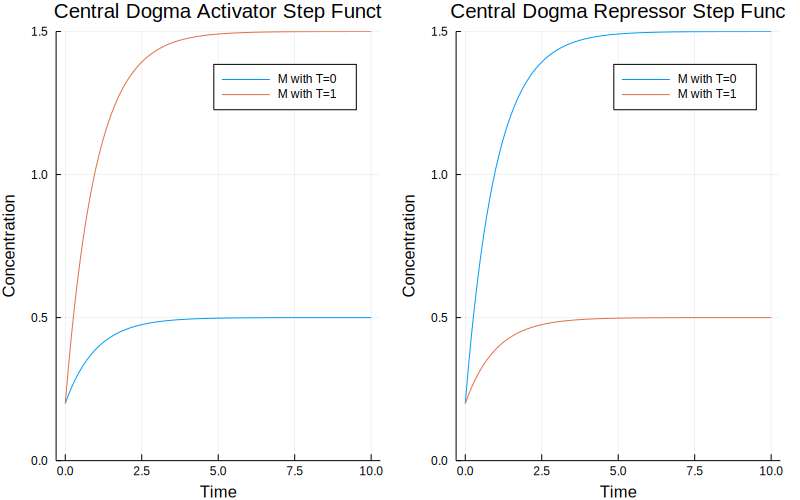

In [6]:
P1=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*0.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*1.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=1",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Activator Step Funct")
xaxis!("Time")
yaxis!("Concentration")

P2=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*1.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=0",seriestype=:line,ylims = (0,1.5))
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + k_M*D*0.)/γ_M*(1-exp(-γ_M*t)),label="\\ M with T=1",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Repressor Step Func")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

We can see now that, when concentration of `T` is above a certain value, transcription is activated (for `T` as activator) or repressed (for `T`as repressors).  Binding and unbinding of`T` to the promoter is a highly dynamic procces, and more realistic scenario is that the probability of transcription of a gene `Ø([T],[D])` depends on the time the trascription factor `T` is bound to the DNA `D`. This bindng and unbinding can be written as a chemical interaction as

$$ [D_{inactive}] + [T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{active}] \tag{25}$$

To obtain a more general approximation,  we will introduce the possibility that several molecuels of the transcription factor are required to activate transcription. This is known as `cooperativity` and is represented in the following scheme of interaction. 

$$ [D_{inactive}] + n[T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{Active}] \tag{26}$$

The dynamics of binding and unbinding of transcription factor to the DNA is much faster that the dynamics of transcription. Therefore, using separation of scales, we can consider that equilibrium is reached verty fast. Based on this assumption and on Mass Action Law, the concetrations at equilibrium satisfy the following relation: 
 
$$[D_{inactive}] \cdot [T]^n= \frac{k_2}{k_1}  [D_{Active}]= K_D \cdot [D_{Active}] \tag{27}$$

where $K_D$ is the chemical equilibrium constant. We have also an extra constraint given by the fact that the total number of DNA copies `[D]` is fixed, therefore:

$$[D_{Active}] + [D_{Inactive}] = [D] \tag{28}$$

Combining the equations 27 and 28, we can write the ratio of active copies of the transcriotion factor as:

$$
\begin{align}
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n [D_{Inactive}]}{K_D}\cdot \frac{1}{[D_{Active}]+[D_{Inactive}]} \tag{29}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n }{K_D \frac{[D_{Inactive}]+[D_{Active}]}{[D_{Inactive}]}} \tag{30}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n }{ K_D(\frac{[D_{Active}]}{[D_{Inactive}]}+1)} \tag{31}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{[T]^n}{\frac{K_D \cdot [D_{Active}]}{[D_{Inactive}]}+K_D} \tag{32}\\
\end{align}$$


and using again the relation in Eq. 27, we obtain

$$\frac{[D_{Active}]}{[D]}=\frac{[T]^n}{K_D+[T]^n}  \tag{33}$$

if we rewrite the equilibrium constant $K_D$ as a new constant to the power of `n`, we obatin:

$$h^{(1)}=\frac{[D_{Active}]}{[D]}=\frac{[T]^n}{K^n+[T]^n}  \tag{34}$$

This equation $h^{(1)}$ is the well known `Hill function`. It satisfies the following properties:

1. $h^{(1)}(0)=0 \tag{35}$

2. $h^{(1)}(T=K)=\frac{1}{2} \tag{36}$

3.  $\lim_{T\to \infty} h^{(1)}(T) = 1 \tag{37}$

4. The maximum slope  controlled by the parameter `n`, with is calles sigmoidicity. To study the value of the slope and its correlation with the value of `n`, we divide numerator and denominator by $K^n$ and define the variable x as $x= T/K$. This way the normalized version of the Hill function is: 

$$
h^{(1)}=\frac{x^n}{1+x^n}\tag{38}
$$

we then calculate the slope by caluclating the value of the derivative of $h^{(1)}$ at the point $x=1$: 

$$\begin{align}
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} (1+x^n)-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{39}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} +x^n \cdot n x^{n-1}-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{40}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1}  +x^n \cdot n x^{n-1}-x^n \cdot n x^{-1}}{(1+x^n)^2} \tag{41}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}&=\frac{n x^{n-1} }{(1+x^n)^2} \tag{42}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}\big|_{x=1}&=\frac{n 1^{n-1} }{(1+1^n)^2} \tag{43}\\
\frac{\mathrm{d} h^{(1)}}{\mathrm{d} x}\big|_{x=1}&=\frac{n}{4} \tag{44}
\end{align}$$



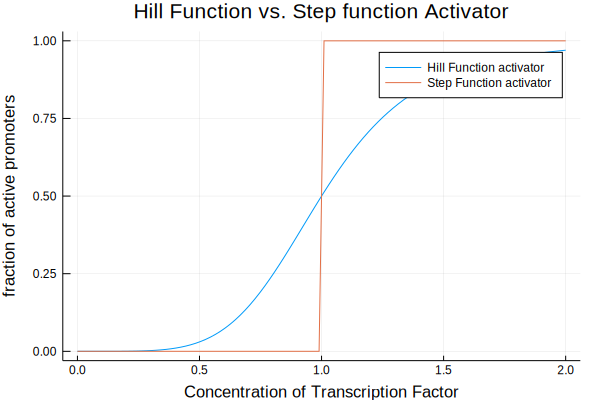

In [7]:
n=5
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
P1=plot(T_vector,ϕ,lab="Hill Function activator")

n=1000
ϕ=T_vector.^n./(K.^n.+T_vector.^n)
P1=plot!(T_vector,ϕ,lab="Step Function activator")

title!("Hill Function vs. Step function Activator")
xlabel!("Concentration of Transcription Factor")
ylabel!("fraction of active promoters")

For repressors, 

$$ [D_{Active}] + n[T] \overset{k_1}{\underset{k_2}{\longleftrightarrow}}  [D_{Inactive}] \tag{45}$$

the equilibrium is now

$$[D_{Active}] \cdot [T]^n= \frac{k_2}{k_1}  [D_{Inactive}]= K_D \cdot [D_{Inactive}] \tag{46}$$
 and using the same conservation of of `D` we have
 
 $$
\begin{align}
\frac{[D_{Active}]}{[D]}&=\frac{K_D [D_{Inactive}]}{[T]^n}\cdot \frac{1}{[D_{Active}]+[D_{Inactive}]} \tag{47}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{[T]^n \frac{[D_{Inactive}]+[D_{Active}]}{[D_{Inactive}]}} \tag{48}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{[T]^n (\frac{[D_{Active}]}{[D_{Inactive}]}+1)} \tag{49}\\
\\
\frac{[D_{Active}]}{[D]}&=\frac{K_D }{\frac{[T]^n \cdot [D_{Active}]}{[D_{Inactive}]}+[T]^n} \tag{50}\\
\end{align}$$

and using again the relation in Eq 24, we obtain

$$\frac{[D_{Active}]}{[D]}=\frac{[K_D}{K_D+[T]^n}  \tag{51}$$

if we rewrite again the equilibrium constant $K_D$ as a new constant to the power of `n`, we obatin:

$$h^{(2)}=\frac{[D_{Active}]}{[D]}=\frac{K^n}{K^n+[T]^n} \tag{52}$$

This equation $h^{(1)}$ is now the `Hill function` for repressor molecules. It satisfies the following properties:

1. $h^{(2)}(0)=1 \tag{53}$

2. $h^{(2)}(K)=\frac{D}{2} \tag{54}$

3.  $\lim_{T\to \infty} h^{(2)}(T) = 0 \tag{55}$

4. The maximum slope  controlled by the parameter `n`, with is calles sigmoidicity. To study the value of the slope and its correlation with the value of `n`, we divide numerator and denominator by $K^n$ and define the variable x as $x= T/K$. This way the normalized version of the Hill function is: 

$$
h^{(2)}=\frac{1}{1+x^n}\tag{56}
$$

we then calculate the slope by caluclating the value of the derivative of $h^{(2)}$ at the point $x=1$: 


$$\begin{align}
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}&=\frac{0 \cdot  (1+x^n) - 1 \cdot n x^{-1}}{(1+x^n)^2} \tag{57}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}&=- \frac{ n x^{-1}}{(1+x^n)^2} \tag{58}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}\big|_{x=1}&=- \frac{n 1^{n-1} }{(1+1^n)^2} \tag{59}\\
\frac{\mathrm{d} h^{(2)}}{\mathrm{d} x}\big|_{x=1}&=-\frac{n}{4} \tag{60}
\end{align}$$



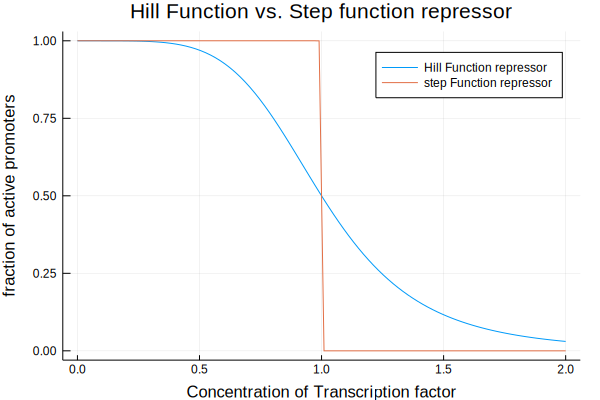

In [8]:
n=5
ϕ=K.^n./(K.^n.+T_vector.^n)
P2=plot(T_vector,ϕ,lab="Hill Function repressor")

n=1000
ϕ=K.^n./(K.^n.+T_vector.^n)
P2=plot!(T_vector,ϕ,lab="step Function repressor")
title!("Hill Function vs. Step function repressor")
xlabel!("Concentration of Transcription factor")
ylabel!("fraction of active promoters")

The Hill functions as activator or repressor are a more realistic approach to introduce the effect of a transcription factor into the Central Dogma Model. This way, the dynamics of production of `mRNA` for activator is like this:  

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}= \alpha_0 + k_M \frac{[T^n][D]}{K^n+[T^n]}-\gamma_M[M]= \alpha_0 +\alpha_M \frac{[T^n]}{K^n+[T^n]}-\gamma_M[M] \tag{61}
$$
and for repression, we have

$$
\frac{\mathrm{d} [M]}{\mathrm{d} t}= \alpha_0 + k_M \frac{K^n[D]}{K^n+[T^n]}-\gamma_M[M]= \alpha_0 + \alpha_M \frac{K^n}{K^n+[T^n]}-\gamma_M[M] \tag{62}
$$

where we defined  $\alpha_M= k_M [D]$ as the maximum transcription rate of mRNA `M`. The set of interactions is then generalized as:

$$
\begin{align}
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{63}\\ 
\Psi (T,K) &\overset{α_M}{\longrightarrow} M \tag{64}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{65}
\end{align}
$$

illustrating that the production of `M` is defined by a function of the amount of transcription factor `T` and the constant of the Hill funcion `K` that corresponds to the half maximal concetration of transcripton factor. This function $\Psi$ can refer to the Hill function for activator or for repressor. The analytical solution can be dertived similarly as before, and the resulting equation is:

$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[T^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{66}\\
           [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{67}
 \end{align*}$$ 
 
 for activators and repressors respectively:

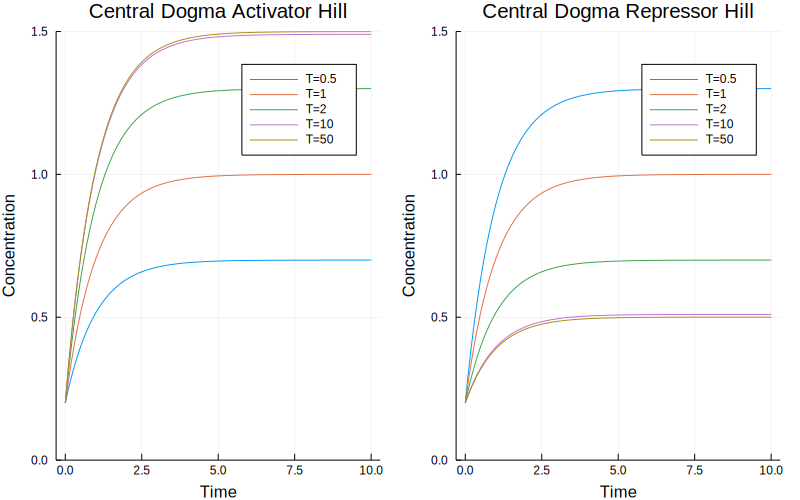

In [9]:
α_M=k_M*D
K=1.
n=2.
T=0.5
ϕ=T.^n./(K.^n.+T.^n)
P1=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=0.5",seriestype=:line,ylims = (0,1.5))
T=1
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=1",seriestype=:line,ylims = (0,1.5))
T=2
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=2",seriestype=:line,ylims = (0,1.5))
T=10
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=10",seriestype=:line,ylims = (0,1.5))
T=50
ϕ=T.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=50",seriestype=:line,ylims = (0,1.5))

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

T=0.5
ϕ=K.^n./(K.^n.+T.^n)
P2=plot(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=0.5",seriestype=:line,ylims = (0,1.5))
T=1
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=1",seriestype=:line,ylims = (0,1.5))
T=2
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=2",seriestype=:line,ylims = (0,1.5))
T=10
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=10",seriestype=:line,ylims = (0,1.5))
T=50
ϕ=K.^n./(K.^n.+T.^n)
plot!(t,t-> M₀*exp(-γ_M*t)+(α_0 + α_M * ϕ)/γ_M*(1-exp(-γ_M*t)),label="\\ T=50",seriestype=:line,ylims = (0,1.5))
title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")


plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

The Hill function combines the fact that one mRNA can produce may proteins, but also the dependence on the amount of trancription factor `T`. It also adds a saturation term for high concentrations of trancription factor, compared to the value of the Hill constant `K`. 

## Protein dynamics

After analyzing the effect induced by the Hill function, the next step is to add the dynamics of the protein. The reactions that take place can be illustrated as:

$$
\begin{align}
\emptyset &\overset{\alpha_0}{\longrightarrow} M \tag{68}\\ 
\Psi (T,K) &\overset{α_M}{\longrightarrow} M \tag{69}\\ 
M &\overset{\gamma_M}{\longrightarrow} \emptyset \tag{70}\\
M &\overset{\alpha_P}{\longrightarrow} P \tag{71}\\
P &\overset{\gamma_P}{\longrightarrow} \emptyset \tag{72}
\end{align}
$$


where `P` is the concentration of protein, $\alpha_P$ and $\gamma_P$ correspond to syntehsis and degradation of `P`. Explicitely, for activators, the set of differential equations is:


$$\begin{align*}
       [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[T^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{73}\\
           \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{74}
 \end{align*}$$ 

and for repressors: 


$$\begin{align*}
           [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{75}\\
           \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{76}
 \end{align*}$$ 


To solve analytically, we will proceed with separation of variables in eq. 76:

$$\begin{align*}
           \frac{\mathrm{d} [P]}{\mathrm{d} t}  + \gamma_P[P]&=  \alpha_P [M] \tag{77}
 \end{align*}$$ 
 
 We need to calculate the integrating factor, $e^{ \int p(x)dx }$, which in this case is $e^{ \int k_2dt }=e^{\gamma_P \cdot t}$. We then multiply both terms in the previous equation by the integrating factor. In this case is simply 
 $$\begin{align*}
           \frac{\mathrm{d} [P]}{\mathrm{d} t} e^{\gamma_P \cdot t} + \gamma_P[P] e^{\gamma_P \cdot t}&=  \alpha_P [M] e^{\gamma_P \cdot t}\tag{78}
 \end{align*}$$ 
 
 the first term of the equation is simply

 $$\begin{align*}
           \frac{\mathrm{d} ([P]e^{\gamma_P \cdot t})}{\mathrm{d} t}  &=  \alpha_P [M] e^{\gamma_P \cdot t}\tag{78}
 \end{align*}$$
 
 now we substitute the solution for `M(t)` in Eq 66 and 67 into Eq 78:
 $$\begin{align*}
           \frac{\mathrm{d} ([P]e^{\gamma_P \cdot t})}{\mathrm{d} t}  &=  \alpha_P \big[ M(0) \cdot e^{-\gamma_M \cdot t} + \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t}) e^{\gamma_P \cdot t}\big] \tag{78}
 \end{align*}$$
 
 where variable W is simply 
 $$W=\alpha_0 + \alpha_M \cdot \Psi(T,K)$$
 
 This function $\Psi(T,K)$ can refer to the Hill function for activator or for repressor. Now we solve the differential equation:
 
  $$\begin{align*}
           \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P \int  e^{\gamma_P \cdot t} \big[M(0) \cdot e^{-\gamma_M \cdot t} dt  + \int  \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})  dt \big]\tag{78}
 \end{align*}$$
 
We reorganize the second term:
 
   $$\begin{align*}
           \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P  \big[\int e^{\gamma_P \cdot t} M(0) \cdot e^{-\gamma_M \cdot t} dt  + \int  \frac{W}{\gamma_M} e^{\gamma_P \cdot t} dt  -  \int e^{\gamma_P \cdot t} e^{-\gamma_M \cdot t}  dt \big]\tag{78}\\
            \int \mathrm{d} ([P]e^{\gamma_P \cdot t})  &=  \alpha_P   \big[M(0) \int e^{(\gamma_P-\gamma_M) t} dt  +  \frac{W}{\gamma_M} \int e^{\gamma_P \cdot t} dt  -  \frac{W}{\gamma_M} \int e^{(\gamma_P-\gamma_M) t}  dt \big]\tag{79}
 \end{align*}$$
 
 We solve the integral
 
  $$\begin{align*}
           P(t)e^{\gamma_P \cdot t}  &=  \alpha_P  \big[ \frac{e^{(\gamma_P-\gamma_M)\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{e^{\gamma_P \cdot t}}{\gamma_P}- \frac{e^{(\gamma_P-\gamma_M)\cdot t}}{\gamma_P-\gamma_M}) \big] +C \tag{80}\\
             P(t) &=  \alpha_P  \big[ \frac{e^{-\gamma_M\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{e^{-\gamma_M\cdot t}}{\gamma_P-\gamma_M}) \big] +C \cdot e^{-\gamma_P \cdot t}  \tag{81}
 \end{align*}$$
 
 Now we calculate the integration constant using the initial condition for the protein $P(t=0)=P[0]$:
  $$\begin{align*}
             P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{1}{\gamma_P-\gamma_M}) \big] +C  \tag{81}
 \end{align*}$$
 which rearranging terms becomes:
  $$\begin{align*}
             P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{\gamma_P-\gamma_M-\gamma_P}{\gamma_P(\gamma_P-\gamma_M)}) \big] +C  \tag{82}\\
              P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{-\gamma_M}{\gamma_P(\gamma_P-\gamma_M)}) \big] +C  \tag{83}\\ 
              P(0) &=  \alpha_P  \big[ \frac{M(0)}{\gamma_P-\gamma_M} - \frac{W}{\gamma_P(\gamma_P-\gamma_M)} \big] +C \tag{84}\\ 
 \end{align*}$$
 
 so
  $$\begin{align*}
               C &= P(0)-  \frac{ \alpha_P M(0)}{\gamma_P-\gamma_M} + \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \tag{85}\\
               C &= P(0)+  \frac{\alpha_P}{\gamma_P-\gamma_M}  \big[ \frac{W}{\gamma_P} -  M(0)\big] \tag{85}\\
 \end{align*}$$
 
Finally, the set of equations is:
 
  $$\begin{align*}
        [M(t)]  &= [M(0)] \cdot e^{-\gamma_M \cdot t} + \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{86}\\
                P(t) &=  \alpha_P  \big[ \frac{e^{-\gamma_M\cdot t}M(0)}{\gamma_P-\gamma_M} + \frac{W}{\gamma_M} (\frac{1}{\gamma_P}- \frac{e^{-\gamma_M\cdot t}}{\gamma_P-\gamma_M}) \big] + \big[P(0)+  \frac{\alpha_P}{\gamma_P-\gamma_M}  \big[ \frac{W}{\gamma_P} -  M(0)\big] \big]\cdot e^{-\gamma_P \cdot t}  \tag{87}
 \end{align*}$$


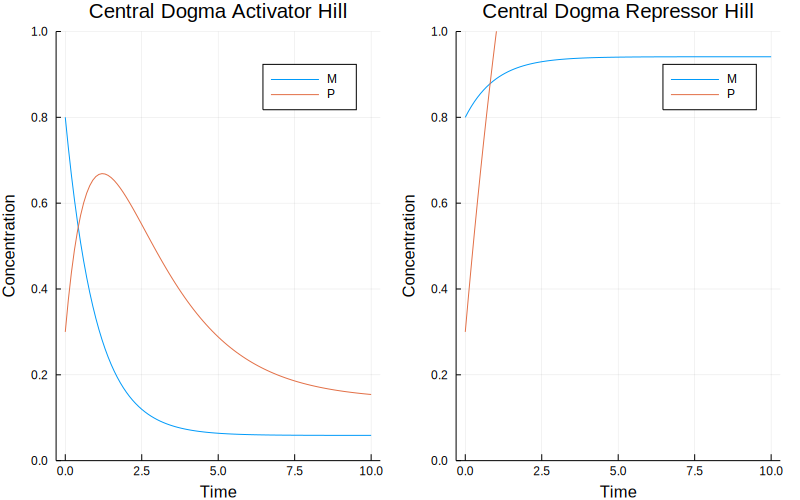

In [10]:
α_P=0.6*2
α_M=0.6
γ_M=1
γ_P=0.5
T=1.0*0.5
K=2
α_0=0.3*0
M₀=0.4*2
P₀=0.3
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> M₀*exp(-γ_M*t)+W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> M₀*exp(-γ_M*t)+W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,1))
plot!(t,t->  α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ P",seriestype=:line)


title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")



plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))


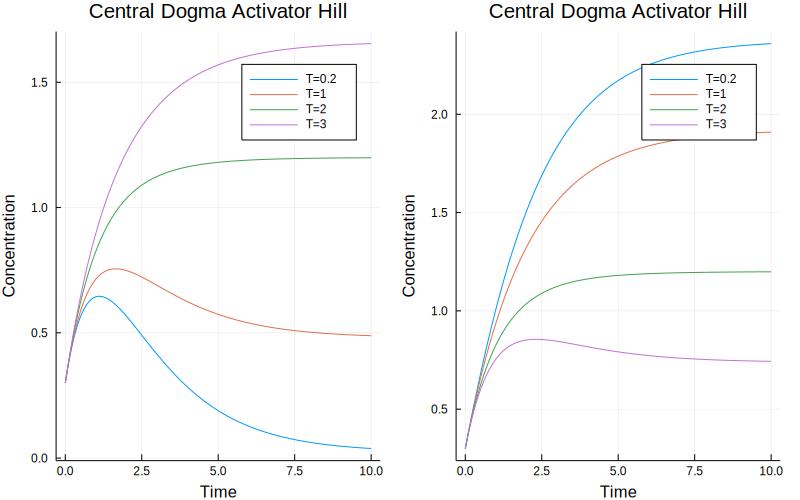

In [11]:
T=0.2
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=0.2",seriestype=:line)
T=1
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=1",seriestype=:line)
T=2
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=2",seriestype=:line)
T=3
ϕ=T.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=3",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

T=0.2
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=0.2",seriestype=:line)
T=1
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=1",seriestype=:line)
T=2
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=2",seriestype=:line)
T=3
ϕ=K.^n./(K.^n.+T.^n)
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot!(t,t-> α_P * ((M₀*exp(-γ_M*t)/(γ_P-γ_M))+W/γ_M*((1/γ_P)-(exp(-γ_M*t)/(γ_P-γ_M))))+C*exp(-γ_P*t),label="\\ T=3",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

 for the special case that no initial protein or mRNA:
 
  $$\begin{align*}
        [M(t)]  &=  \frac{W}{\gamma_M} (1  -  e^{-\gamma_M \cdot t})\tag{88}\\
                P(t) &=  \alpha_P   \big[\frac{W}{\gamma_M} (\frac{\gamma_P-\gamma_M -\gamma_P e^{-\gamma_M\cdot t}}{\gamma_P(\gamma_P-\gamma_M)}) \big] +  \big[ \frac{\alpha_P W}{(\gamma_P-\gamma_M)\gamma_P} \big]\cdot e^{-\gamma_P \cdot t}  \tag{89}\\
                P(t) &=  \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \big[\frac{ \gamma_P-\gamma_M -\gamma_P e^{-\gamma_M\cdot t}}{\gamma_M}  +    e^{-\gamma_P \cdot t}\big]\cdot  \tag{90}\\
                 P(t) &=  \frac{\alpha_P W}{\gamma_P(\gamma_P-\gamma_M)}  \big[\frac{ \gamma_P(1- e^{-\gamma_M\cdot t})-\gamma_M}{\gamma_M}  +    e^{-\gamma_P \cdot t}\big]  \tag{91}\\
                  P(t) &=  \frac{\alpha_P W}{\gamma_P-\gamma_M}  \big[\frac{ 1- e^{-\gamma_M\cdot t}}{\gamma_M}   +    \frac{e^{-\gamma_P \cdot t} -1}{\gamma_P}\big] \tag{92}\\
                   P(t) &=  \frac{\alpha_P W}{\gamma_P-\gamma_M}  \big[\frac{ 1- e^{-\gamma_M\cdot t}}{\gamma_M}   -    \frac{1- e^{-\gamma_P \cdot t}}{\gamma_P}\big] \tag{93}
 \end{align*}$$
 

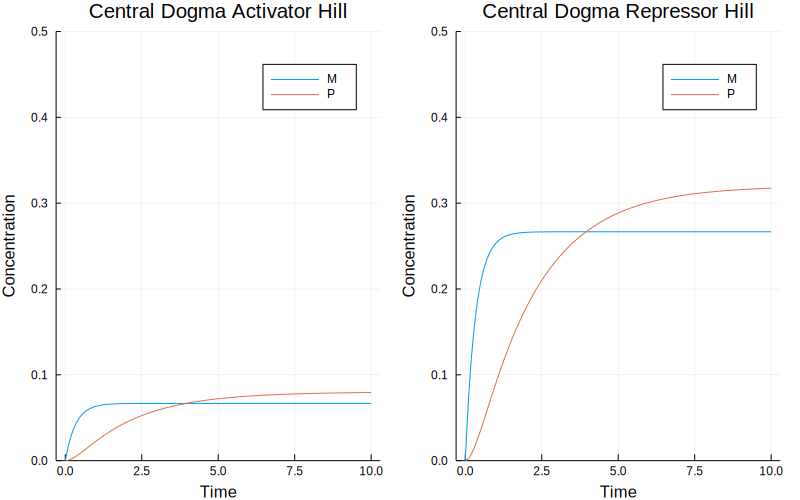

In [12]:
α_P=0.6
α_M=0.6
γ_M=3
γ_P=0.5
T=1.
K=2
α_0=0.
M₀=0.0
P₀=0.
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_P-γ_M)*(((1-exp(-γ_M*t))/γ_M)-((1-exp(-γ_P*t))/γ_P)),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_P-γ_M)*(((1-exp(-γ_M*t))/γ_M)-((1-exp(-γ_P*t))/γ_P)),label="\\ P",seriestype=:line)

title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

Having these two analytical solutions, one can ask many different questions, such as: 
 - How the amount protein changes with the cooperativity ? 
 - How the amount of protein changes with the Hill constant?

since $γ_M >> γ_P$, quite often, people tend to simplify the term that accounts for mRNA degradation 

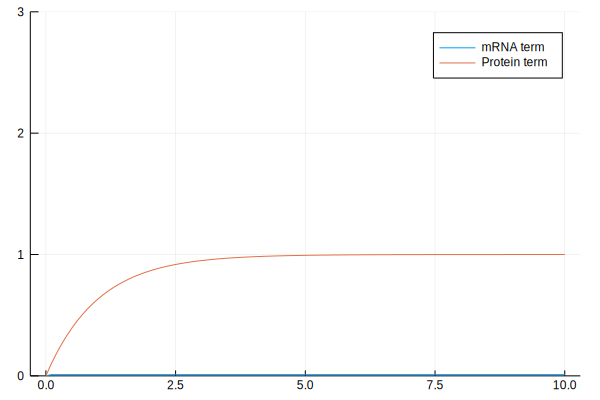

In [28]:
γ_M=100
γ_P=1
plot(t,t-> (1-exp(-γ_M*t))/γ_M,label="\\ mRNA term",seriestype=:line,ylims = (0,3))
plot!(t,t-> (1-exp(-γ_P*t))/γ_P,label="\\ Protein term",seriestype=:line,ylims = (0,3))

Therefore, we can simplify the Eq 93 as:

 $$\begin{align*}
                   P(t) &=  \frac{\alpha_P W}{-\gamma_M}  \big[ -    \frac{1- e^{-\gamma_P \cdot t}}{\gamma_P}\big] \tag{94}\\
                   P(t) &=  \frac{\alpha_P W}{\gamma_M \gamma_P}  \big[1- e^{-\gamma_P \cdot t}\big] \tag{95}
 \end{align*}$$
 
Therefore, the Central Dogma of Molecular Biology can be written in terms of two simple equations: 

$$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} \big[1  -  e^{-\gamma_M \cdot t}\big]\tag{96}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M \gamma_P}  \big[1- e^{-\gamma_P \cdot t}\big] \tag{97}
 \end{align*}$$


To finalize, the fact that the cell is growing while mRNA and Protein are being produced introduces an extra  dilution factor $\mu$ that reduces the concetration of `M`and `P`. If the volume is assumed to grow linearly,we can simply write this dilution factor as: 

$$\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  k_M [D]  [T]- \gamma_M [M] - \mu [M] = k_M [D]  [T]- (\gamma_M+\mu) [M]  \tag{98}\\
 \frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] - \mu [P] =  \alpha_P [M]-(\gamma_P +\mu )[P] \tag{99}
 \end{align*}$$
 
 The final analyitical solutions can be obtained following the same strategy:

$$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M+\mu} \big[1  -  e^{-(\gamma_M+\mu) \cdot t}\big]\tag{100}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{(\gamma_M+\mu) (\gamma_P+\mu)}  \big[1- e^{-(\gamma_P+\mu) \cdot t}\big] \tag{101}
 \end{align*}$$
 
 In real systems `mRNA` natural degradation is orders of magnitude larger that the effect of dilution. Therefore $\gamma_M+\mu \approx \gamma_M$, and the final equations are: 
 
 $$\begin{align*}
           M(t)  &=  \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M} \big[1  -  e^{-\gamma_M \cdot t}\big]\tag{102}\\
           P(t) &=  \alpha_P \frac{\alpha_0 + \alpha_M \frac{[K^n]}{K^n+[T^n]}}{\gamma_M (\gamma_P+\mu)}  \big[1- e^{-(\gamma_P+\mu) \cdot t}\big] \tag{103}
 \end{align*}$$


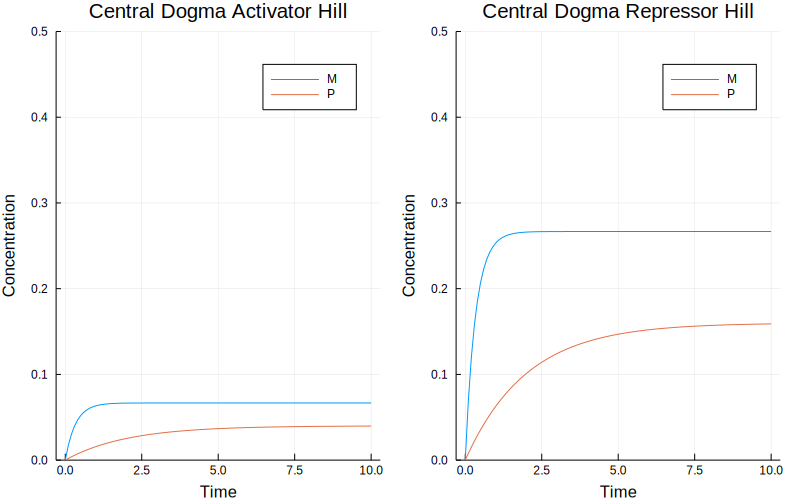

In [29]:
α_P=0.6
α_M=0.6
γ_M=3
γ_P=0.5
μ=0.5
T=1.
K=2
α_0=0.
M₀=0.0
P₀=0.
n=2
t=collect(0:0.1:10);
ϕ=T.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P1=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_M*(γ_P+μ))*(1-exp(-γ_P*t)),label="\\ P",seriestype=:line)

title!("Central Dogma Activator Hill")
xaxis!("Time")
yaxis!("Concentration")

ϕ=K.^n./(K.^n.+T.^n)
α_M=k_M*D
W=α_0 + α_M * ϕ
C=P₀ + α_P / (γ_P-γ_M) * ((W/γ_P)-M₀)
P2=plot(t,t-> W/γ_M*(1-exp(-γ_M*t)),label="\\ M",seriestype=:line,ylims = (0,0.5))
plot!(t,t-> α_P * W/(γ_M*(γ_P+μ))*(1-exp(-γ_P*t)),label="\\ P",seriestype=:line)

title!("Central Dogma Repressor Hill")
xaxis!("Time")
yaxis!("Concentration")

plot(P1,P2,layout=(1,2),legend=true,size = (800, 500))

## Numerical solution of the Central Dogma

Another way to solve this type of models when they become too complex is using nuymerical simulations

In [14]:
using DifferentialEquations
tspan = (0.0,10)

(0.0, 10)

In [15]:
CentralDogma4_DSL! = @ode_def ab begin
   dM = α_0-γ_M*M+α_M*T^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_0 α_M α_P γ_M γ_P T K n

CentralDogma5_DSL! = @ode_def ab begin
   dM = α_0-γ_M*M+α_M*K^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_0 α_M α_P γ_M γ_P T K n

(::ab{getfield(Main, Symbol("##77#81")),getfield(Main, Symbol("##78#82")),getfield(Main, Symbol("##79#83")),Nothing,Nothing,getfield(Main, Symbol("##80#84")),Expr,Expr}) (generic function with 2 methods)

In [16]:
p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
u₀ = [M₀,P₀]
prob3 = ODEProblem(CentralDogma4_DSL!,u₀,tspan,p)
prob4 = ODEProblem(CentralDogma5_DSL!,u₀,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [0.0, 0.0]

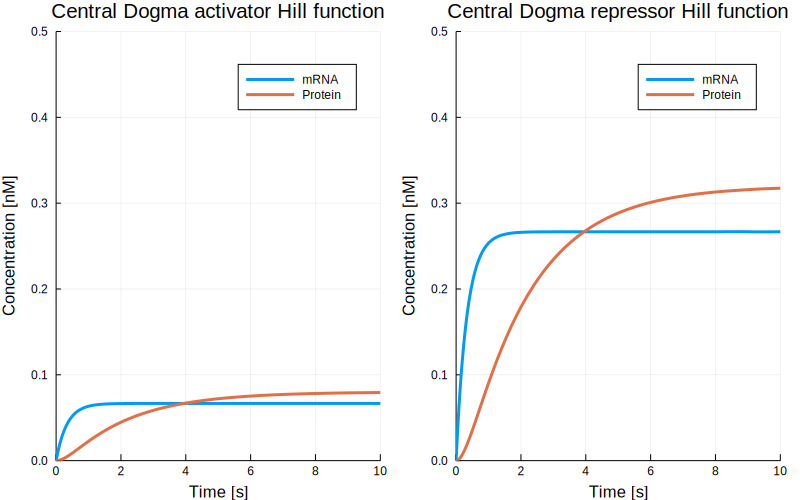

In [17]:
sol3 = solve(prob3)
sol4 = solve(prob4)
P3=plot(sol3,label=["mRNA","Protein"],ylims = (0,0.5))
title!("Central Dogma activator Hill function")
xlabel!("Time [s]")
ylabel!("Concentration [nM]")
P4=plot(sol4,label=["mRNA","Protein"],ylims = (0,0.5))
title!("Central Dogma repressor Hill function")
xlabel!("Time [s]")
ylabel!("Concentration [nM]")
plot(P3,P4,layout=(1,2),legend=true,size = (800, 500))

which are equivalent to the dynamcis predicte in the analytical soloution

In [18]:
function CentralDogma_activator_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
     p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
     prob3 = ODEProblem(CentralDogma4_DSL!,u₀,tspan,p)
     sol3 = solve(prob3)
     x=("T = $(T)")
     plot!(sol3,vars=(2),label=x)
end

function CentralDogma_repressor_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
     p=[α_0,α_M,α_P,γ_M,γ_P,T,K,n];
     prob4 = ODEProblem(CentralDogma5_DSL!,u₀,tspan,p)
     sol4 = solve(prob4)
     x=("T = $(T)")
     plot!(sol4,vars=(2),label=x)
end

CentralDogma_repressor_parameters (generic function with 1 method)

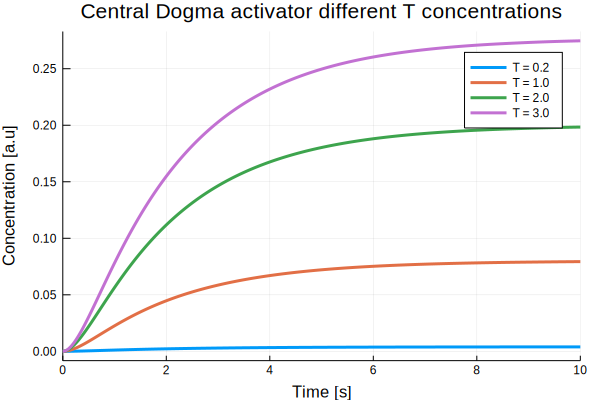

In [19]:
plot()
for T in [0.2,1,2,3]
   CentralDogma_activator_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
end
title!("Central Dogma activator different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

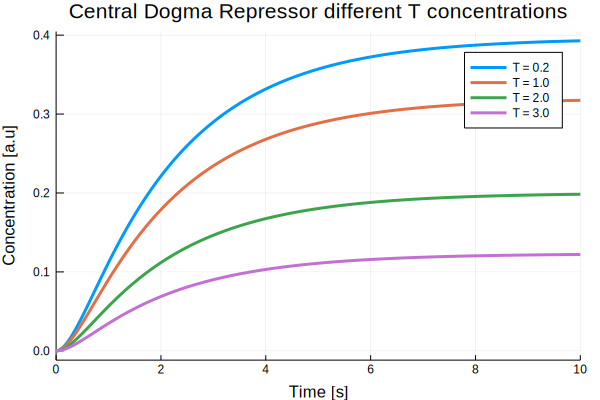

In [20]:
plot()
for T in [0.2,1,2,3]
   CentralDogma_repressor_parameters(α_0,α_M,α_P,γ_M,γ_P,T,K,n)
end
title!("Central Dogma Repressor different T concentrations")
xlabel!("Time [s]")
ylabel!("Concentration [a.u]")

## Conclusions

In conclusion, both the activator form and the repressor forms of the Hill function can be used to model numerically the transctiption and translation of mRNA into protein regulated by transcriptional activators and represors, respectively. The dynamics is similar, but the dependence on the amount of transcription factor `T` is reversed. 

The Hill functions are widely used in Biochemistry, Physiology, pharmacology and Genetics. 

It is physically unrealistic: 
all ligands have to bind simultaneously 
exact in conditions of extremely high cooperativity  
it is based on equilibrium considerations (Biology is far from equilibrium)

Sequential or independent binding are more realistic, but they represent often a small correction versus the highly simple Hill equation. 

Therefore, the simplicity of the Hill equation wins and it is widely used in many biological contexts (as we will see…)
